## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.

Create 1 slide with informative visualization for each question. Explore data using SQL and Python but use Tableau for final visualization.

Don't limit your EDA to these 10 questions. Let's be creative :).

#### Set up connection to database

In [20]:
import psycopg2
import pandas as pd

host = 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com'
port = "5432"
user = 'lhl_student'
pwd = 'lhl_student'
database = 'mid_term_project'

conn = psycopg2.connect(user = user,
                              password = pwd,
                              host = host,
                              port = port,
                              database = database)
def query(query, conn=conn):
    return pd.read_sql(query, conn)

# 

*** 

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

###### 

#### Query ARR_DELAY from the flights table

In [2]:
df_arr_delay = query('select ARR_DELAY from flights')

###### 

#### Find how many NULLs in the dataset as a percentage of the total number of rows

In [3]:
df_arr_delay.isnull().sum() / df_arr_delay.shape[0]

arr_delay    0.019573
dtype: float64

#### A very small percentage, so we can probably delete them.

In [4]:
df_arr_delay.dropna(inplace=True)

###### 

#### Visualize outliers

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

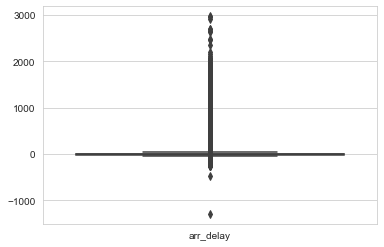

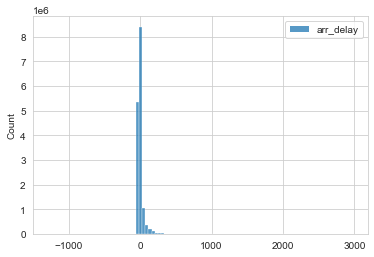

In [6]:
sns.set_style('whitegrid')

sns.boxplot(data=df_arr_delay)
plt.show()

sns.histplot(df_arr_delay, bins=100)
plt.show()

In [7]:
import scipy.stats as stats
import numpy as np

In [8]:
print('Mean: ', df_arr_delay['arr_delay'].mean())
print('Median: ', df_arr_delay['arr_delay'].median())

Mean:  5.475932330076428
Median:  -6.0


In [9]:
df_arr_delay.describe()

,arr_delay
count,1.561574e+07
mean,5.475932e+00
std,4.987401e+01
min,-1.290000e+03
25%,-1.500000e+01
50%,-6.000000e+00
75%,8.000000e+00
max,2.973000e+03


###### 

#### Remove outliers using Z-scores for reach observation. Keep only rows with Z-scores less than 3.

In [10]:
#find absolute value of z-score for each observation
z = np.abs(stats.zscore(df_arr_delay))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
df_arr_delay_z = df_arr_delay[(z<3).all(axis=1)]

###### 

#### Visualize dataset without outliers and observe for normality.

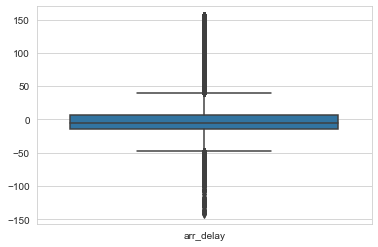

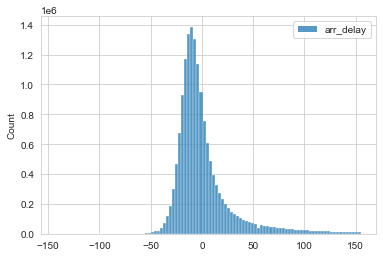

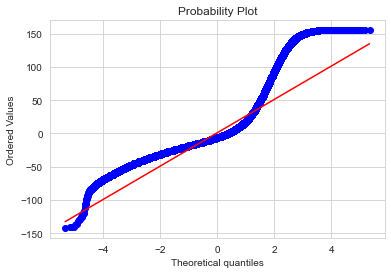

In [23]:
sns.boxplot(data=df_arr_delay_z)
plt.show()

sns.histplot(df_arr_delay_z, bins=100)
plt.show()

import pylab 
stats.probplot(df_arr_delay_z['arr_delay'], dist="norm", plot=pylab)
pylab.show()

#### The graphs seem to show that the distribution is not normal.

###### 

#### Statistical tests for normality.

In [12]:
print('Mean: ', df_arr_delay_z['arr_delay'].mean())
print('Median: ', df_arr_delay_z['arr_delay'].median())

Mean:  1.0646501473382453
Median:  -6.0


#### Mean and median are rather different. Therefore, distribution is not normal.

In [13]:
stats.shapiro(df_arr_delay_z)

/Users/jimisi/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.793079674243927, pvalue=0.0)

In [14]:
stats.normaltest(df_arr_delay_z)

NormaltestResult(statistic=array([7392520.61801622]), pvalue=array([0.]))

In [15]:
stats.skewtest(df_arr_delay_z)

SkewtestResult(statistic=array([2303.20141869]), pvalue=array([0.]))

In [16]:
stats.kurtosistest(df_arr_delay_z)

KurtosistestResult(statistic=array([1444.91655225]), pvalue=array([0.]))

#### The p-values are all the tests = 0.0, therefore we can reject the null hypothesis that the distribution is normal. The distribution is not normal.

###### 

#### Statistical test that mean = 0

In [17]:
stats.ttest_1samp(df_arr_delay_z, 0)

Ttest_1sampResult(statistic=array([147.31528933]), pvalue=array([0.]))

#### The p-value = 0.0, therefore we can reject the null hypothesis that the mean of the distribution is equal to zero.

# 

*** 

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

# 

*** 

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

# 

*** 

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

##### Query necessary data from flights

In [21]:
df_flights = query('select fl_date, origin_airport_id, taxi_out, taxi_in from flights')

KeyboardInterrupt: 

# 

*** 

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

# 

*** 

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?